In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# 기존 raw data에서 grade를 추가해줌
# 0.6이상 - 4 / 0.5이상 - 3 / 0.4이상 - 2 / 0.3이상 - 1 / 기타 - 0

In [4]:
bb = pd.read_csv("../project/Raw_First_Value.csv") 
bb

,team,year,month,pov,obp,slg,ba,era,whip,grade
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92,0
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79,0
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58,0
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68,2
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60,2
...,...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46,3
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38,1
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47,0
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40,1


c:\Users\soonae\miniconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


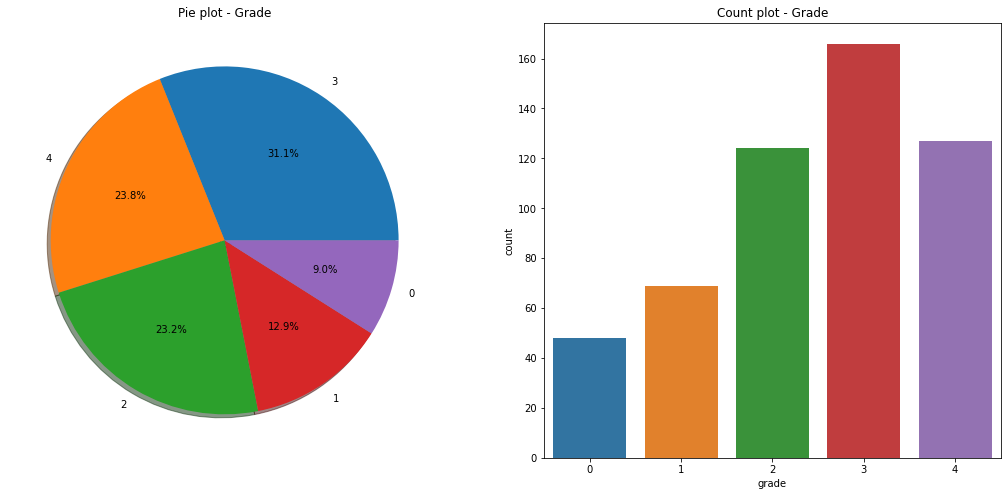

In [55]:
# 등급별로 얼마나 있는지 비율 확인

f, ax = plt.subplots(1, 2, figsize=(18, 8))

bb['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Grade')
ax[0].set_ylabel('')
sns.countplot('grade', data=bb, ax=ax[1])
ax[1].set_title('Count plot - Grade')

plt.show()

In [56]:
corr = bb.corr()
print(corr)

               team          year         month       pov       obp       slg  \
team   1.000000e+00 -1.216931e-13  1.684128e-17 -0.115621 -0.078452 -0.068407   
year  -1.216931e-13  1.000000e+00 -1.199418e-02 -0.001751 -0.179386 -0.299121   
month  1.684128e-17 -1.199418e-02  1.000000e+00 -0.004201  0.094359  0.069708   
pov   -1.156206e-01 -1.750906e-03 -4.201248e-03  1.000000  0.332913  0.316072   
obp   -7.845232e-02 -1.793857e-01  9.435866e-02  0.332913  1.000000  0.747138   
slg   -6.840687e-02 -2.991214e-01  6.970795e-02  0.316072  0.747138  1.000000   
ba    -1.170678e-01 -2.545450e-01  1.695144e-01  0.233210  0.862917  0.812916   
era    8.328565e-02 -1.628113e-01  7.797397e-02 -0.493769  0.195104  0.294633   
whip   9.793962e-02 -1.351297e-01  6.655080e-02 -0.455063  0.102360  0.160535   
grade -1.378147e-01  3.907200e-04  3.883022e-03  0.899811  0.368969  0.343539   

             ba       era      whip     grade  
team  -0.117068  0.083286  0.097940 -0.137815  
year  -0.254

In [111]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    534 non-null    int64  
 1   year    534 non-null    int64  
 2   month   534 non-null    int64  
 3   pov     534 non-null    float64
 4   obp     534 non-null    float64
 5   slg     534 non-null    float64
 6   ba      534 non-null    float64
 7   era     534 non-null    float64
 8   whip    534 non-null    float64
 9   grade   534 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 41.8 KB


<AxesSubplot:>

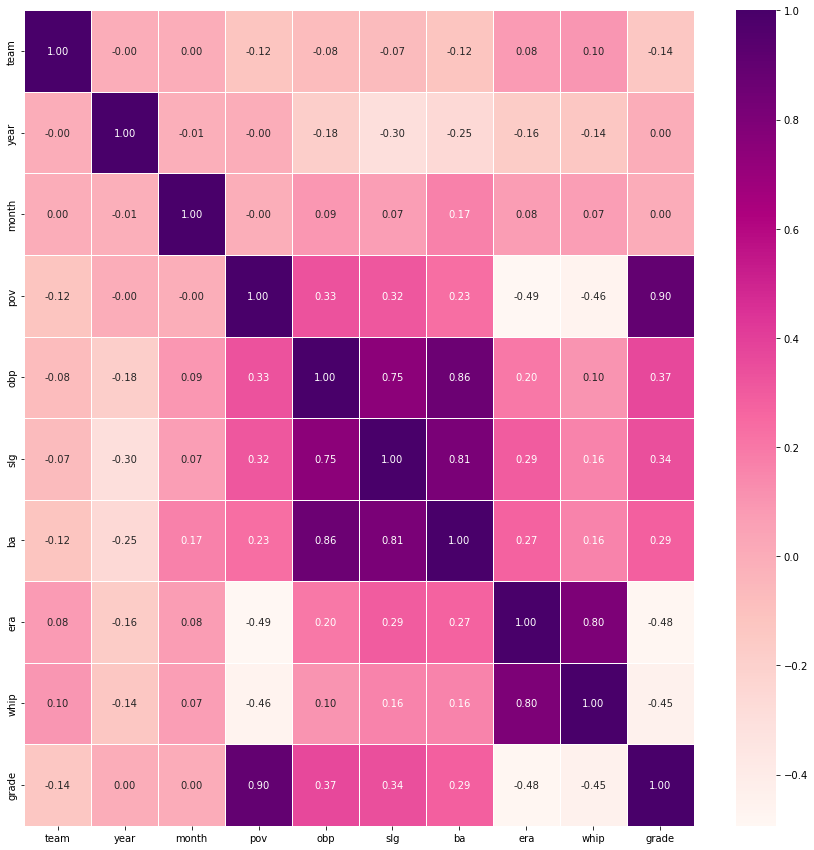

In [59]:
# 히트맵 기준 각 항목별 상관관계

plt.figure(figsize=(15,15))
sns.heatmap(data = bb.corr(), annot=True,
fmt = '.2f', linewidths =.5, cmap='RdPu')

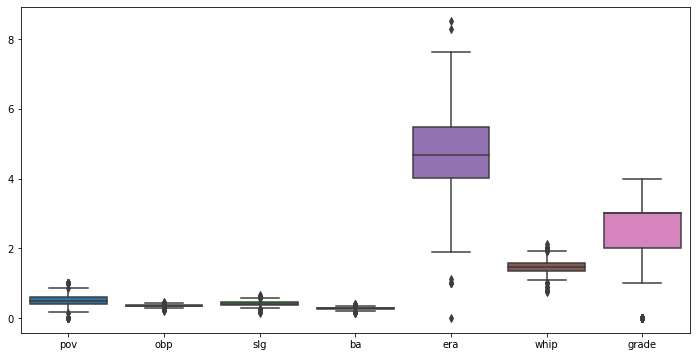

In [60]:
# 평균 자책점의 경우 이상치가 크게 나타남

plt.figure(figsize=(12,6))
sns.boxplot(data=bb.iloc[:, 3:]);

<Figure size 864x432 with 0 Axes>

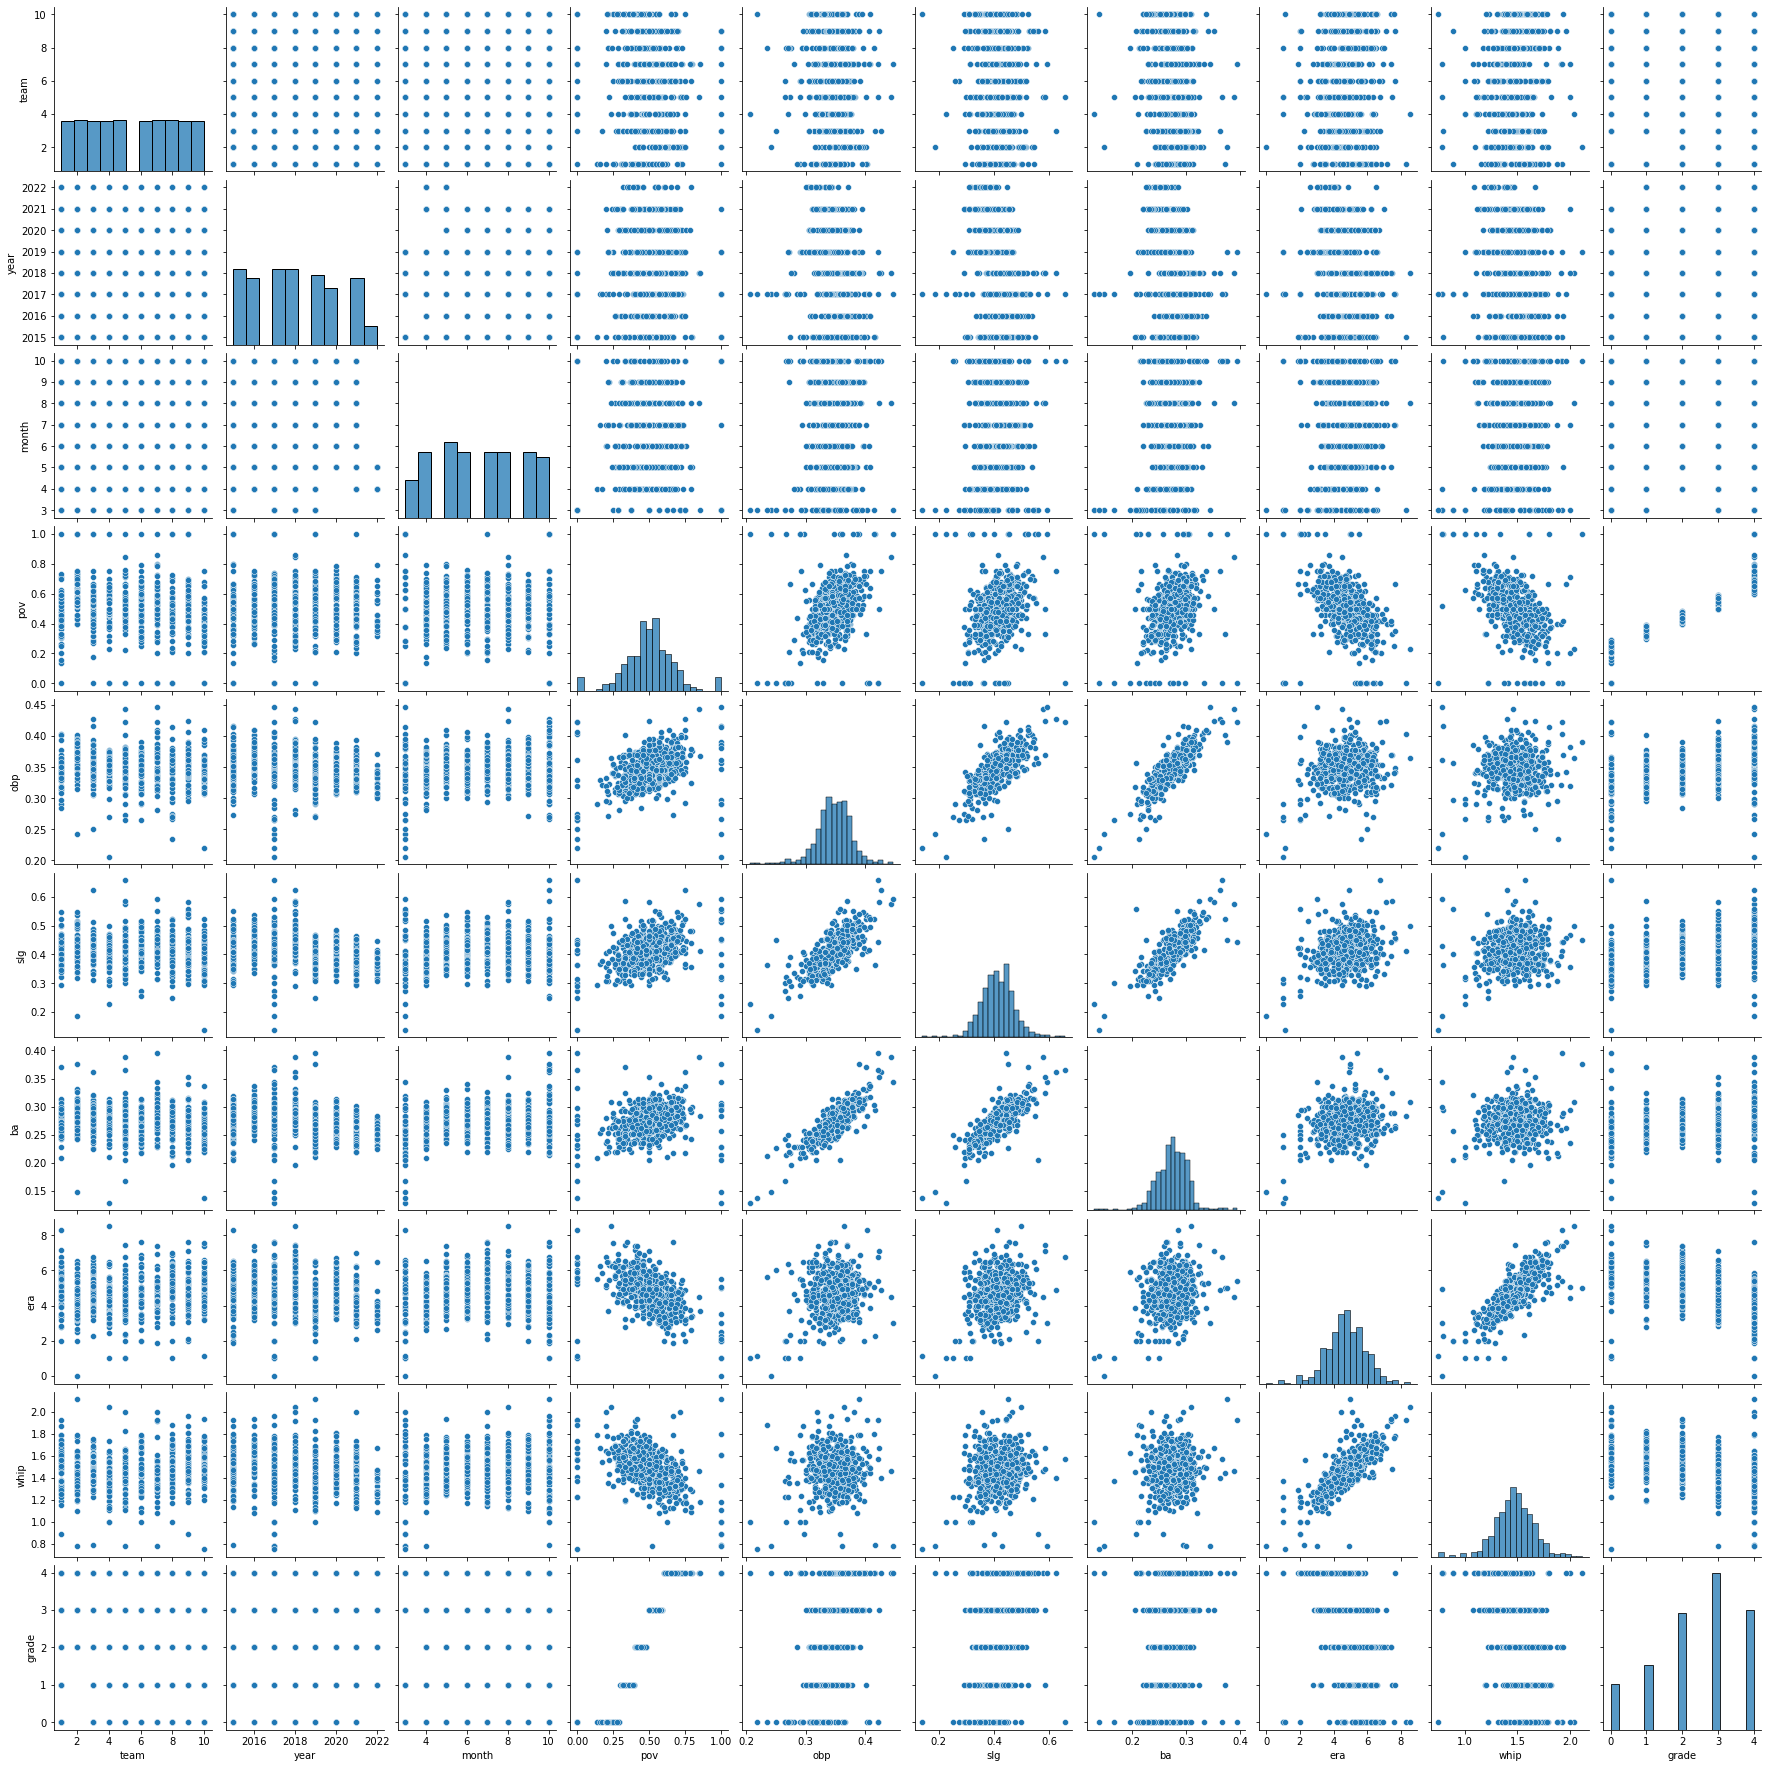

In [61]:
plt.figure(figsize=(12,6))
sns.pairplot(data=bb);

<Figure size 864x432 with 0 Axes>

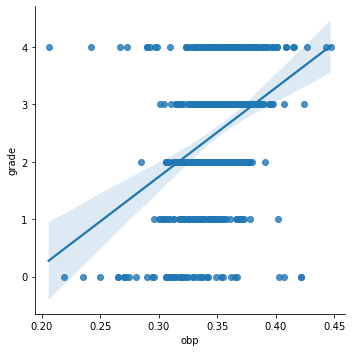

In [62]:
# 회귀선 + 플롯 그래프

plt.figure(figsize=(12,6))
sns.lmplot(x='obp', y='grade', data=bb);

In [63]:
bb.columns

Index(['team', 'year', 'month', 'pov', 'obp', 'slg', 'ba', 'era', 'whip',
       'grade'],
      dtype='object')

In [64]:
# 승률과 등급과의 회귀 Report

import statsmodels.api as sm

X = bb[['obp', 'slg', 'ba', 'era', 'whip', 'grade', ]]
y = bb['pov']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pov   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              4395.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:28:06   Log-Likelihood:                          631.84
No. Observations:                 534   AIC:                                     -1252.
Df Residuals:                     528   BIC:                                     -1226.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
obp            1.0501      0.192      5.477      0.000       0.673       1.427
slg            0.3029      0.100      3.029      0.003       0.106       0.499
ba            -0.8852      0.251     -3.523      0.000      -1.379      -0.392
era           -0.0238      0.005     -4.679      0.000      -0.034      -0.014
whip           0.0583      0.024      2.418      0.016       0.011       0.106
grade          0.1121      0.004     29.871      0.000       0.105       0.119
==============================================================================
Omnibus:                      183.685   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.512
Skew:                           1.345   Prob(JB):                    1.02e-262
Kurtosis:                       9.855   Cond. No.                         521.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X = bb.drop(['grade', 'obp'], axis=1)
y = bb['grade']

In [66]:
# Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

bb = DecisionTreeClassifier(max_depth=2, random_state=13)
bb.fit(X_train, y_train)

y_pred_tr = bb.predict(X_train)
y_pred_test = bb.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7775175644028103
Test Acc :  0.794392523364486


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2,4,7,10]}
bb = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=bb, param_grid=params, cv=5)
gridsearch.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [68]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00219421, 0.00201106, 0.00200067, 0.00199456]),
    'mean_score_time': array([0.00099769, 0.00118527, 0.00099201, 0.00099726]),
    'mean_test_score': array([0.78090284, 1.        , 1.        , 1.        ]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([4, 1, 1, 1]),
    'split0_test_score': array([0.77570093, 1.        , 1.        , 1.        ]),
    'split1_test_score': array([0.77570093, 1.        , 1.        , 1.        ]),
    'split2_test_score': array([0.78504673, 1.        , 1.        , 1.        ]),
    'split3_test_score': array([0.78504673, 1.        , 1.        , 1.        ]),
    'split4_test_score': array([0.78301887, 1.        , 1.        , 1.        ]),
    'std

In [69]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=13)

In [70]:
gridsearch.best_score_

1.0

In [71]:
gridsearch.best_params_

{'max_depth': 4}

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scalar', StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [73]:
param_grid = [{'clf__max_depth': [2,4,7,10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [74]:
# 초 간단 로지스텍 회귀 Test

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.5480093676814989
Test Acc :  0.5420560747663551


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtdt = DecisionTreeClassifier(random_state=13, max_depth=4)
dtdt.fit(X_train, y_train)
pred = dtdt.predict(X_test)

accuracy_score(y_test, pred)

1.0

In [76]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dtdt, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [77]:
grid_cv.best_score_

1.0

In [78]:
grid_cv.best_params_

{'max_depth': 6}

In [79]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,1.0,1.0
1,8,1.0,1.0
2,10,1.0,1.0
3,12,1.0,1.0
4,16,1.0,1.0
5,20,1.0,1.0
6,24,1.0,1.0


In [80]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_Depth =', depth, ', Accurracy =', accuracy)

Max_Depth = 6 , Accurracy = 1.0
Max_Depth = 8 , Accurracy = 1.0
Max_Depth = 10 , Accurracy = 1.0
Max_Depth = 12 , Accurracy = 1.0
Max_Depth = 16 , Accurracy = 1.0
Max_Depth = 20 , Accurracy = 1.0
Max_Depth = 24 , Accurracy = 1.0


In [81]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

1.0

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [83]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [84]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
0,1,0.857159,50,6
3,1,0.857159,50,6
27,1,0.857159,50,10
24,1,0.857159,50,10
15,1,0.857159,50,8


In [85]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 50}

In [86]:
grid_cv.best_score_

0.8571585274889211

In [87]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

0.9345794392523364

In [88]:
# 승률에 대한 연관성이 가장 크게 나타남

best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index = X_train.columns)
top7_cols = best_cols.sort_values(ascending=False)[:8]
top7_cols

pov      0.651306
era      0.099349
whip     0.069085
slg      0.064007
ba       0.063062
month    0.022521
team     0.018736
year     0.011934
dtype: float64

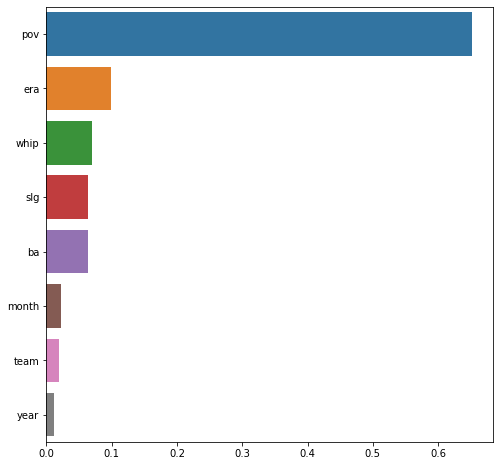

In [89]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top7_cols, y=top7_cols.index)
plt.show()

In [90]:
top7_cols.index

Index(['pov', 'era', 'whip', 'slg', 'ba', 'month', 'team', 'year'], dtype='object')

In [128]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

In [132]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
print(confusion_matrix(y_test, pred))

precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
print('정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision, recall))

[[ 9  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 35  0]
 [ 0  0  0  0 25]]
정밀도: 1.0000, 재현율: 1.0000


In [116]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('=========')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc,pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re,f1,auc))

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [123]:
f1 = round(f1_score(y_test, pred, average='micro'), ndigits=3)

In [124]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].